In [36]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [37]:
dataset = pd.read_csv("NewDataset.csv")
dataset = dataset.iloc[11:, :] * 10**5 - 131904
openVal = dataset.iloc[:, 45]
closeVal = dataset.iloc[:, 49]
openVal = openVal.values
closeVal = closeVal.values
test = []
for i in range(len(openVal)):
    if closeVal[i] - openVal[i] < 0:
        test.append(0)
    else:
        test.append(1)
print(openVal)
print(closeVal)
print(test)

[-18364. -17537. -17709. ... -15871. -15981. -15952.]
[-17536. -17630. -17713. ... -15981. -15951. -15864.]
[1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 

In [38]:
print(min(dataset.min()))
print(max(dataset.max()))

-131904.0
75226777476.0


# Find high value by open value

In [39]:
x = dataset.iloc[:, 1:46]
y = dataset.iloc[:,   46]
x = x.values
y = y.values
y = y.reshape(len(y),1)
print(x)
print(y)

[[-1.96e+04 -1.96e+04 -1.97e+04 ... -1.88e+04  3.11e+10 -1.84e+04]
 [-1.97e+04 -1.96e+04 -1.98e+04 ... -1.85e+04  3.78e+10 -1.75e+04]
 [-1.98e+04 -1.96e+04 -1.99e+04 ... -1.77e+04  9.34e+09 -1.77e+04]
 ...
 [-1.65e+04 -1.61e+04 -1.65e+04 ... -1.59e+04  1.31e+09 -1.59e+04]
 [-1.61e+04 -1.59e+04 -1.61e+04 ... -1.60e+04  1.49e+09 -1.60e+04]
 [-1.59e+04 -1.59e+04 -1.60e+04 ... -1.60e+04  2.00e+09 -1.60e+04]]
[[-17394.]
 [-17456.]
 [-17630.]
 ...
 [-15780.]
 [-15801.]
 [-15844.]]


In [40]:
from xgboost import XGBRegressor
regressorHigh = XGBRegressor()
regressorHigh.fit(x, y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [41]:
yPredHigh = regressorHigh.predict((x[:, :]))
np.set_printoptions(precision=2)
y = dataset.iloc[:, 46]
y = y.values
print(np.concatenate((yPredHigh.reshape(len(yPredHigh), 1), y.reshape(len(y), 1)), 1))

[[-17963.14 -17394.  ]
 [-17400.42 -17456.  ]
 [-17570.23 -17630.  ]
 ...
 [-15668.43 -15780.  ]
 [-15885.73 -15801.  ]
 [-15947.22 -15844.  ]]


In [42]:
from sklearn.metrics import r2_score
r2_score(y, yPredHigh)

0.9998195873255258

In [43]:
diffHigh = []
for i in range(len(y)):
    diffHigh.append(abs(y[i] - yPredHigh[i]))
print(max(diffHigh))
print(np.mean(diffHigh))

1799.565185546875
114.68342995865828


# Find next low

In [44]:
x = dataset.iloc[:, 1:46]
x = x.values
x = np.concatenate((x, yPredHigh.reshape(len(yPredHigh), 1)), 1)
print(x)

[[-1.96e+04 -1.96e+04 -1.97e+04 ...  3.11e+10 -1.84e+04 -1.80e+04]
 [-1.97e+04 -1.96e+04 -1.98e+04 ...  3.78e+10 -1.75e+04 -1.74e+04]
 [-1.98e+04 -1.96e+04 -1.99e+04 ...  9.34e+09 -1.77e+04 -1.76e+04]
 ...
 [-1.65e+04 -1.61e+04 -1.65e+04 ...  1.31e+09 -1.59e+04 -1.57e+04]
 [-1.61e+04 -1.59e+04 -1.61e+04 ...  1.49e+09 -1.60e+04 -1.59e+04]
 [-1.59e+04 -1.59e+04 -1.60e+04 ...  2.00e+09 -1.60e+04 -1.59e+04]]


In [45]:
y = dataset.iloc[:, 47]
y = y.values
y = y.reshape(len(y),1)
print(y)

[[-18546.]
 [-17734.]
 [-17889.]
 ...
 [-16012.]
 [-16011.]
 [-15971.]]


In [46]:
from xgboost import XGBRegressor
regressorLow = XGBRegressor()
regressorLow.fit(x, y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [47]:
yPredLow = regressorLow.predict((x[:, :]))
np.set_printoptions(precision=2)
y = dataset.iloc[:, 47].values
print(np.concatenate((yPredLow.reshape(len(yPredLow), 1), y.reshape(len(y), 1)), 1))

[[-18584.67 -18546.  ]
 [-17846.96 -17734.  ]
 [-17829.43 -17889.  ]
 ...
 [-15981.07 -16012.  ]
 [-16157.24 -16011.  ]
 [-16121.44 -15971.  ]]


In [48]:
from sklearn.metrics import r2_score
r2_score(y, yPredLow)

0.9998268020023243

In [49]:
diffLow = []
for i in range(len(y)):
    diffLow.append(abs(y[i] - yPredLow[i]))
print(max(diffLow))
print(np.mean(diffLow))

1630.2929687500146
111.80325424100829


# Find close

In [50]:
x = dataset.iloc[:, 1:46]
x = x.values
x = np.concatenate((x, yPredHigh.reshape(len(yPredHigh), 1)), 1)
x = np.concatenate((x, yPredLow.reshape(len(yPredLow), 1)), 1)
print(x)

[[-19550.   -19550.   -19738.   ... -18364.   -17963.14 -18584.67]
 [-19662.   -19628.   -19837.   ... -17537.   -17400.42 -17846.96]
 [-19765.   -19649.   -19874.   ... -17709.   -17570.23 -17829.43]
 ...
 [-16474.   -16116.   -16499.   ... -15871.   -15668.43 -15981.07]
 [-16123.   -15929.   -16124.   ... -15981.   -15885.73 -16157.24]
 [-15943.   -15891.   -15979.   ... -15952.   -15947.22 -16121.44]]


In [51]:
y = dataset.iloc[:,   49]
y = y.values
y = y.reshape(len(y),1)
print(y)

[[-17536.]
 [-17630.]
 [-17713.]
 ...
 [-15981.]
 [-15951.]
 [-15864.]]


In [52]:
from xgboost import XGBRegressor
regressorClose = XGBRegressor()
regressorClose.fit(x, y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [53]:
yPredClose = regressorClose.predict((x[:, :]))
np.set_printoptions(precision=2)
y = dataset.iloc[:, 49].values
print(np.concatenate((yPredClose.reshape(len(yPredClose), 1), y.reshape(len(y), 1)), 1))

[[-18042.9  -17536.  ]
 [-17759.59 -17630.  ]
 [-17597.83 -17713.  ]
 ...
 [-15936.5  -15981.  ]
 [-15904.75 -15951.  ]
 [-15915.82 -15864.  ]]


In [54]:
from sklearn.metrics import r2_score
r2_score(y, yPredClose)

0.9997190438576707

In [55]:
diffClose = []
for i in range(len(y)):
    diffClose.append(abs(y[i] - yPredClose[i]))
print(max(diffClose))
print(np.mean(diffClose))

2014.211181640625
144.90705968643442


# Checking ascending

In [56]:
x = dataset.iloc[:, 1:46]
x = x.values
x = np.concatenate((x, yPredHigh.reshape(len(yPredHigh), 1)), 1)
x = np.concatenate((x, yPredLow.reshape(len(yPredLow), 1)), 1)
x = np.concatenate((x, yPredClose.reshape(len(yPredClose), 1)), 1)
print(x)

[[-19550.   -19550.   -19738.   ... -17963.14 -18584.67 -18042.9 ]
 [-19662.   -19628.   -19837.   ... -17400.42 -17846.96 -17759.59]
 [-19765.   -19649.   -19874.   ... -17570.23 -17829.43 -17597.83]
 ...
 [-16474.   -16116.   -16499.   ... -15668.43 -15981.07 -15936.5 ]
 [-16123.   -15929.   -16124.   ... -15885.73 -16157.24 -15904.75]
 [-15943.   -15891.   -15979.   ... -15947.22 -16121.44 -15915.82]]


In [57]:
from xgboost import XGBClassifier
classifierAscending = XGBClassifier()
classifierAscending.fit(x, test)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [58]:
from sklearn.metrics import confusion_matrix, accuracy_score
yPred = classifierAscending.predict(x)
cm = confusion_matrix(test, yPred)
print(cm)
accuracy_score(test, yPred)

[[10625  3574]
 [ 2673 11977]]


0.7834586987417241

In [59]:
prediction = []
openValues = dataset.iloc[:, 44]
openValues = np.array(openValues)
print(openValues.shape)
for i in range(len(yPredClose)):
    if yPredClose[i] > openValues[i]:
        prediction.append(1)
    else:
        prediction.append(0)
cm = confusion_matrix(test, prediction)
print(cm)
accuracy_score(test, prediction)

(28849,)
[[14178    21]
 [14636    14]]


0.4919407951748761

In [60]:
diffHigh = np.array(diffHigh)
diffHigh = diffHigh.reshape(len(diffHigh), 1)
diffLow = np.array(diffLow)
diffLow = diffLow.reshape(len(diffLow), 1)
diffClose = np.array(diffClose)
diffClose = diffClose.reshape(len(diffClose), 1)
df = pd.DataFrame(np.array(diffClose))
diffHigh = np.array(diffHigh)
diffLow = np.array(diffLow)
df.insert(0, 'close error', diffClose)
df.insert(0, 'low error', diffLow)
df.insert(0, 'high error', diffHigh)
df.to_csv('errors.csv')

In [61]:
dataset = pd.read_csv('errors.csv')
dataset = dataset.iloc[:, 1:-1]
print(dataset)

       high error   low error  close error
0      569.142578   38.667969   506.898438
1       55.578125  112.958984   129.589844
2       59.773437   59.568359   115.173828
3       47.722656    7.912109    52.156250
4       70.326172   37.642578    76.839844
...           ...         ...          ...
28844  142.865234  200.899414    65.930664
28845   84.791016    7.897461    13.184570
28846  111.573242   30.925781    44.503906
28847   84.732422  146.237305    46.246094
28848  103.216797  150.437500    51.823242

[28849 rows x 3 columns]


In [62]:
x = []
for i in range(28849):
    x.append(i)

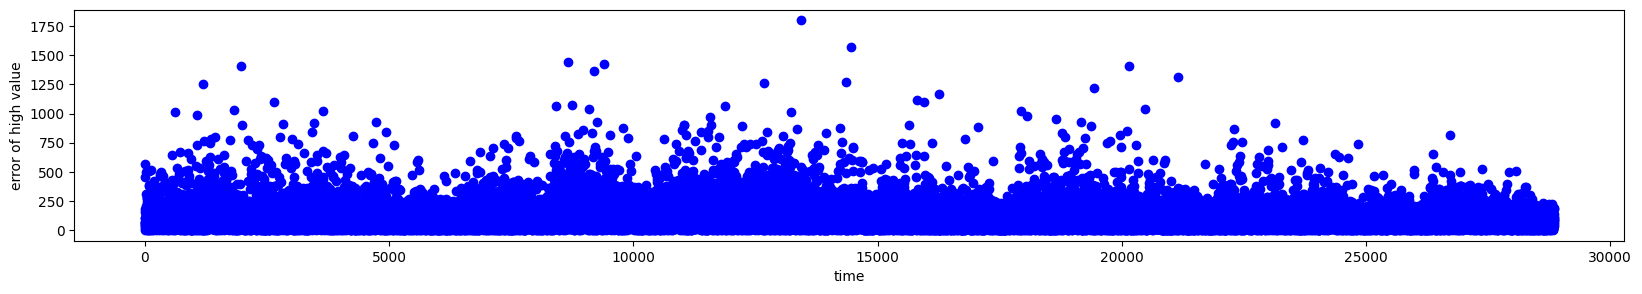

In [63]:
high = dataset.iloc[:, 0].values
plt.scatter(x=x, y=high, c='blue')
plt.xlabel('time')
plt.ylabel('error of high value')
plt.rcParams["figure.figsize"] = (20,3)
plt.show()

In [64]:
counterHigh = 0
for i in range(len(high)):
    if high[i] < 100:
        counterHigh += 1
print(counterHigh)

16223


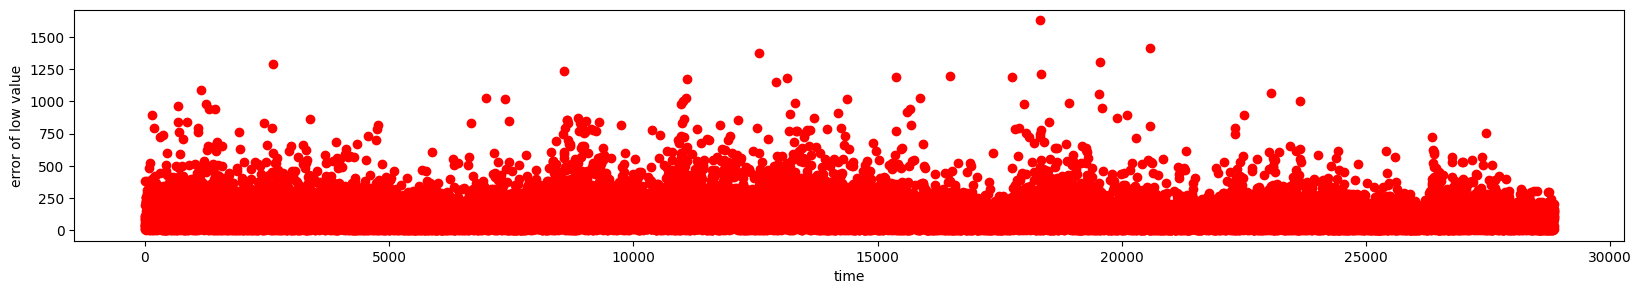

In [65]:
low = dataset.iloc[:, 1].values
plt.scatter(x=x, y=low, c='red')
plt.xlabel('time')
plt.ylabel('error of low value')
plt.rcParams["figure.figsize"] = (20,3)
plt.show()

In [66]:
counterLow = 0
for i in range(len(low)):
    if low[i] < 100:
        counterLow+=1
print(counterLow)

16586


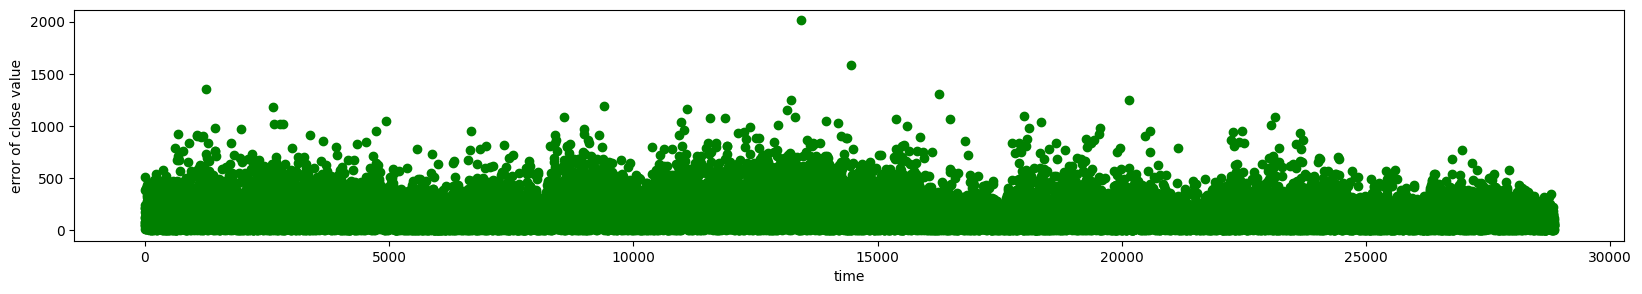

In [67]:
close = dataset.iloc[:, 2].values
plt.scatter(x=x, y=close, c='green')
plt.xlabel('time')
plt.ylabel('error of close value')
plt.rcParams["figure.figsize"] = (20,3)
plt.show()

In [68]:
counterClose = 0
for i in range(len(close)):
    if close[i] < 100:
        counterClose+=1
print(counterClose)

13753


In [69]:
print("percent of under 100 for high is " + str((counterHigh/len(high))*100))
print("percent of under 100 for low is " + str((counterLow/len(low))*100))
print("percent of under 100 for close is " + str((counterClose/len(close))*100))

percent of under 100 for high is 56.234184893757146
percent of under 100 for low is 57.49246074387327
percent of under 100 for close is 47.67236299351797


In [70]:
counterHigh = 0
for i in range(len(high)):
    if high[i] < 200:
        counterHigh += 1
counterLow = 0
for i in range(len(low)):
    if low[i] < 200:
        counterLow+=1
counterClose = 0
for i in range(len(close)):
    if close[i] < 200:
        counterClose+=1
print("percent of under 200 for high is " + str((counterHigh/len(high))*100))
print("percent of under 200 for low is " + str((counterLow/len(low))*100))
print("percent of under 200 for close is " + str((counterClose/len(close))*100))

percent of under 200 for high is 84.96308364241395
percent of under 200 for low is 85.39984054906583
percent of under 200 for close is 75.29550417692121


In [71]:
counterHigh = 0
for i in range(len(high)):
    if high[i] < 150:
        counterHigh += 1
counterLow = 0
for i in range(len(low)):
    if low[i] < 150:
        counterLow+=1
counterClose = 0
for i in range(len(close)):
    if close[i] < 150:
        counterClose+=1
print("percent of under 150 for high is " + str((counterHigh/len(high))*100))
print("percent of under 150 for low is " + str((counterLow/len(low))*100))
print("percent of under 150 for close is " + str((counterClose/len(close))*100))

percent of under 150 for high is 74.01643037886927
percent of under 150 for low is 75.05286145100351
percent of under 150 for close is 64.05421331761933
